<a href="https://colab.research.google.com/github/alpolo1991/Unsupervised_Learning_Algorithms/blob/main/k_mains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## Algoritmos de Aprendizaje No Supervisado

## Descripción
Este notebook guía el proceso de diseño y análisis del algoritmo de **K-means Clustering** para segmentación de clientes.

Utilizaremos un conjunto de datos proporcionado por un centro comercial que contiene información básica de los clientes como edad, género, ingresos anuales y puntaje de gastos. Este análisis permitirá identificar grupos de clientes similares y proporcionar insights accionables para estrategias de marketing.

---

### **Objetivo**
- Comprender el comportamiento de los clientes mediante la agrupación.
- Identificar segmentos de clientes que puedan ser utilizados para personalizar estrategias de marketing.

### **Contexto del Problema**
- Los datos fueron recopilados a través de tarjetas de membresía del supermercado.
- El objetivo es identificar quiénes son los clientes objetivo basándonos en características como ingresos anuales y patrones de gasto.

---

### **Contenido**
1. Análisis exploratorio de datos (EDA)
2. Preprocesamiento de datos
3. Selección de características
4. Entrenamiento del modelo K-means
5. Evaluación del modelo
6. Visualización de resultados
7. Interpretación y documentación


#### Se monta Google Drive

In [30]:
# Se monta Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Versión de Python

In [3]:
# @title Versión de Python

# python3 -m pip list
# python3 -m pip freeze > requirements.txt
!python --version

Python 3.10.12


# Importar bibliotecas

In [4]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.
import plotly.express as px # Para la visualización de datos.

# Configuración de estilo
sns.set(style="whitegrid")

#Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Cargar y explorar el conjunto de datos

En esta sección cargaremos el conjunto de datos y exploraremos sus características principales, como el tamaño del dataset, tipos de datos y valores nulos.

In [31]:
# Cargar el conjunto de datos
file_path = '/content/Mall_Customers.csv'  # Cambiar a la ruta de tu archivo
mall_data = pd.read_csv(file_path, delimiter=",")

**Actividades:**

- Cargar el dataset.
- Inspeccionar las primeras filas.
- Verificar dimensiones, tipos de datos y valores nulos.
- Generar estadísticas descriptivas.
- Visualizar la distribución de variables y relaciones.

In [7]:
# Nombre de columnas y cantidad de filas y columnas.
print("Nombre de columnas y cantidad de filas y columnas: ")
mall_data.columns.values.tolist()

Nombre de columnas y cantidad de filas y columnas: 


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [8]:
# Mostrar información básica del dataset
print("Información del dataset:")
mall_data.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Información de las columnas:**

* **CustomerID:**
  * Identificador único de cliente (entero, no necesario para el
análisis).
* **Gender:**
  * Género del cliente (categórico: Male/Female).
* **Age:**
  * Edad del cliente (numérico).
* **Annual Income (k$):**
  * Ingreso anual en miles de dólares (numérico).
* **Spending Score (1-100):**
  * Puntaje basado en el comportamiento y datos de compra (numérico).

#### Exploración básica del dataset

In [9]:
# Exploración básica del dataset
print("Tamaño del dataset:", mall_data.shape)

Tamaño del dataset: (200, 5)


#### Primeras filas del dataset:

In [33]:
# Primeras filas del dataset:
print("Primeras filas del dataset:")
display(mall_data.head(6))

Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


## 2. Análisis Exploratorio de los Datos (EDA)

### Descripción:
Exploraremos las relaciones entre variables, identificaremos valores atípicos y comprenderemos las características principales del conjunto de datos.

**Objetivo:**

Entender las relaciones entre variables, identificar valores atípicos, tendencias y patrones importantes en los datos. Esto incluye explorar los datos demográficos de los clientes y métricas clave como ingresos y puntaje de gastos.


In [11]:
# Resumen estadístico
print("Resumen estadístico de las variables:")
display(mall_data.describe())

Resumen estadístico de las variables:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Resumen estadístico de las variables numéricas:**
1. Age:
  * Rango entre 18 y 70 años, con una media de 38.85.
2. Annual Income (k$):
  
  * Rango entre 15 y 137 k$, con una media de 60.56.
3. Spending Score (1-100):
  * Rango entre 1 y 99, con una media de 50.2.

#### Validamos valores nulos

In [12]:
# Validamos valores nulos

print("Valores nulos en el dataset:")
display(mall_data.isnull().sum())

Valores nulos en el dataset:


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**No hay valores faltantes en el dataset.**

### Visualizar distribuciones y relaciones

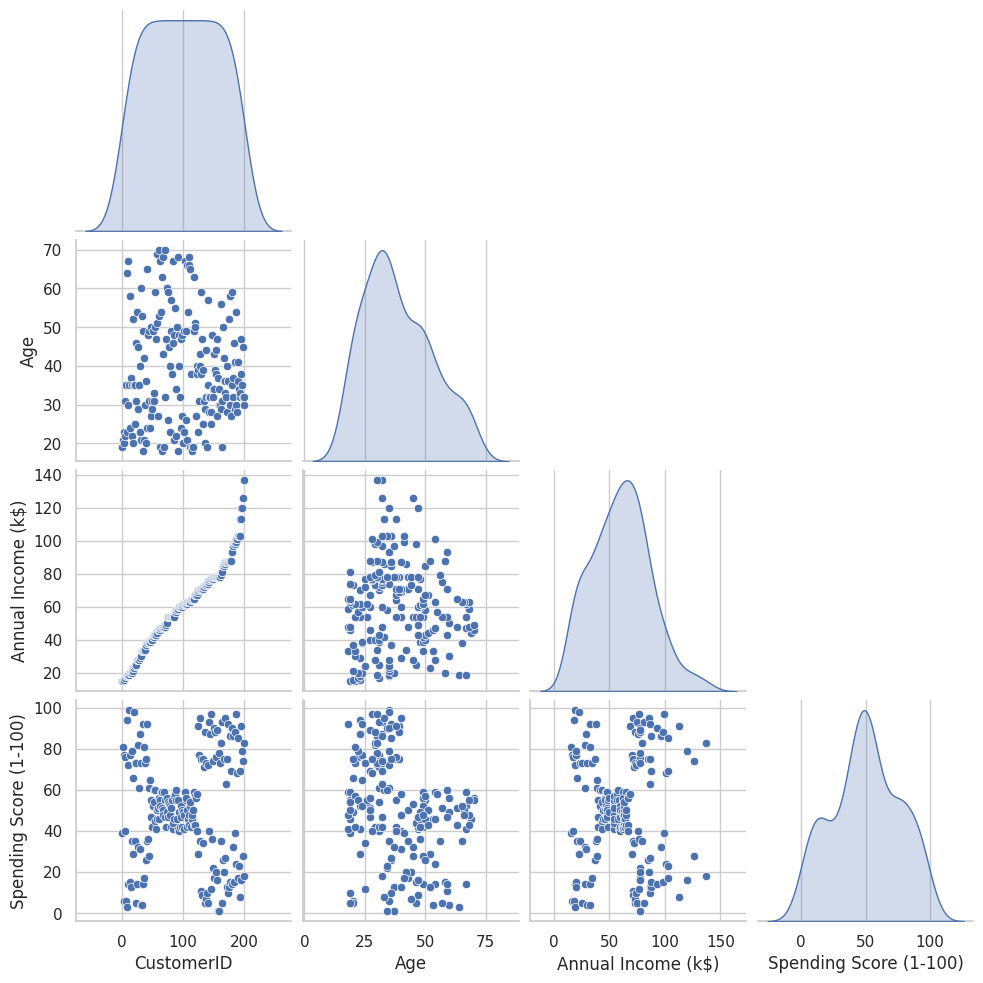

In [13]:
# Visualizar distribuciones y relaciones
sns.pairplot(mall_data, diag_kind='kde', corner=True)
plt.show()

#### Visualizar las distribuciones de las variables Age, Annual Income, y Spending Score.

- Analizar cómo Gender influye en estas variables.
- Detectar posibles valores atípicos.

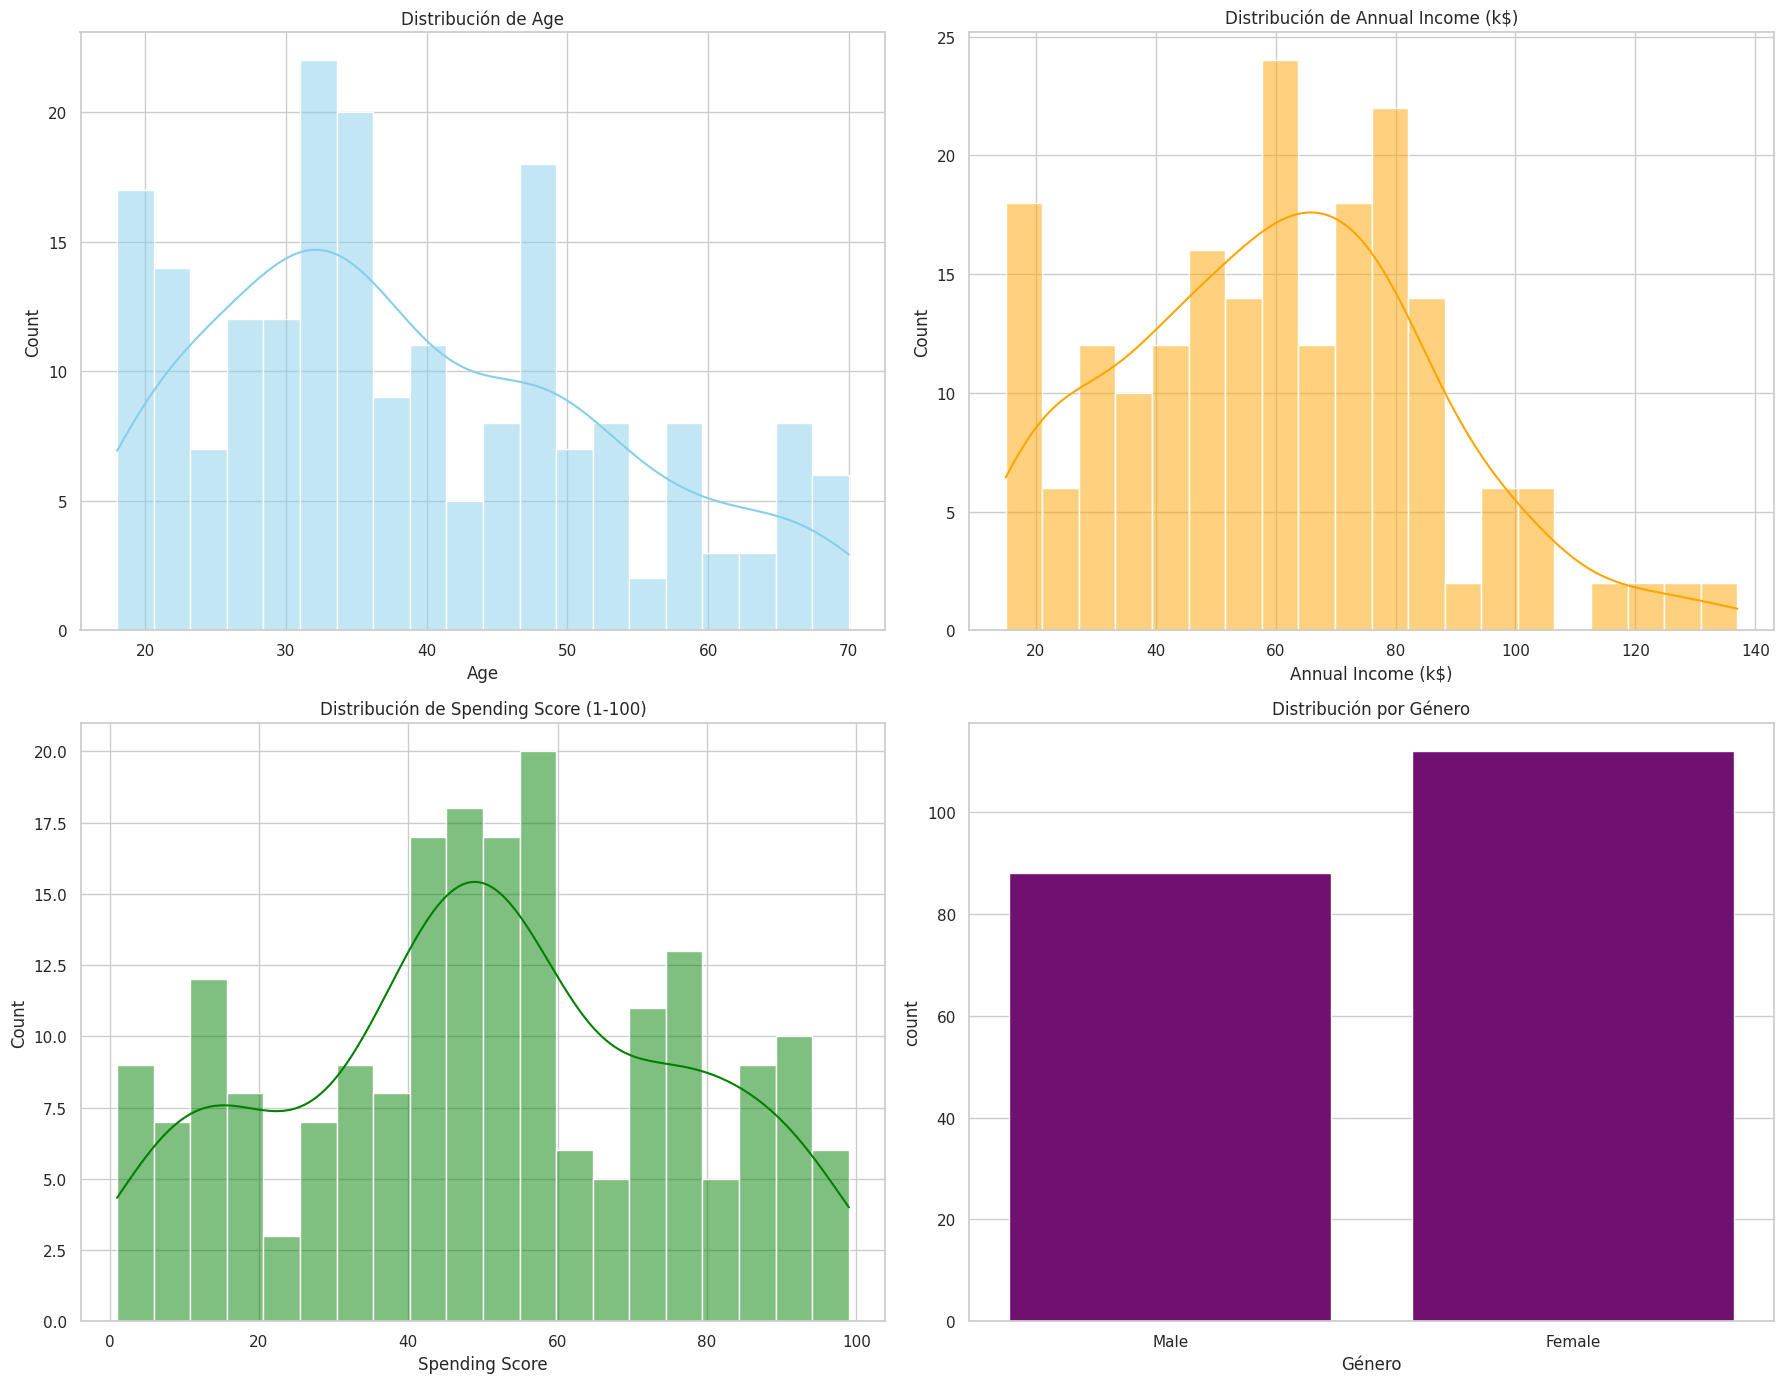

In [14]:
# Visualización de distribuciones de variables numericas
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Distribución de Age
sns.histplot(mall_data['Age'], kde=True, bins=20, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribución de Age")
axes[0,0].set_xlabel("Age")

# Distribución de Annual Income (k$)
sns.histplot(mall_data['Annual Income (k$)'], kde=True, bins=20, ax=axes[0,1], color="orange")
axes[0,1].set_title("Distribución de Annual Income (k$)")
axes[0,1].set_xlabel("Annual Income (k$)")

# Distribución de Spending Score (1-100)
sns.histplot(mall_data['Spending Score (1-100)'], kde=True, bins=20, ax=axes[1,0], color="green")
axes[1,0].set_title("Distribución de Spending Score (1-100)")
axes[1,0].set_xlabel("Spending Score")

# Distribución de Gender
sns.countplot(data=mall_data, x='Gender', ax=axes[1,1], color="purple")
axes[1,1].set_title("Distribución por Género")
axes[1,1].set_xlabel("Género")

plt.tight_layout()
plt.show()

**Las distribuciones de las variables clave muestran lo siguiente:**

1. Age:

  * Distribución aproximadamente simétrica.
La mayoría de los clientes están entre 25 y 50 años.

2. Annual Income (k$):

  * Distribución relativamente uniforme con picos menores alrededor de 50-75 k$.

3. Spending Score (1-100):

  * Distribución bimodal, lo que sugiere la existencia de dos grupos principales de clientes según su comportamiento de gasto.

4. Gender:

  * Distribución relativamente uniform con una diferencia muy pequeña para el genero femenino.

#### Visualizar cómo el Gender afecta las variables numéricas.

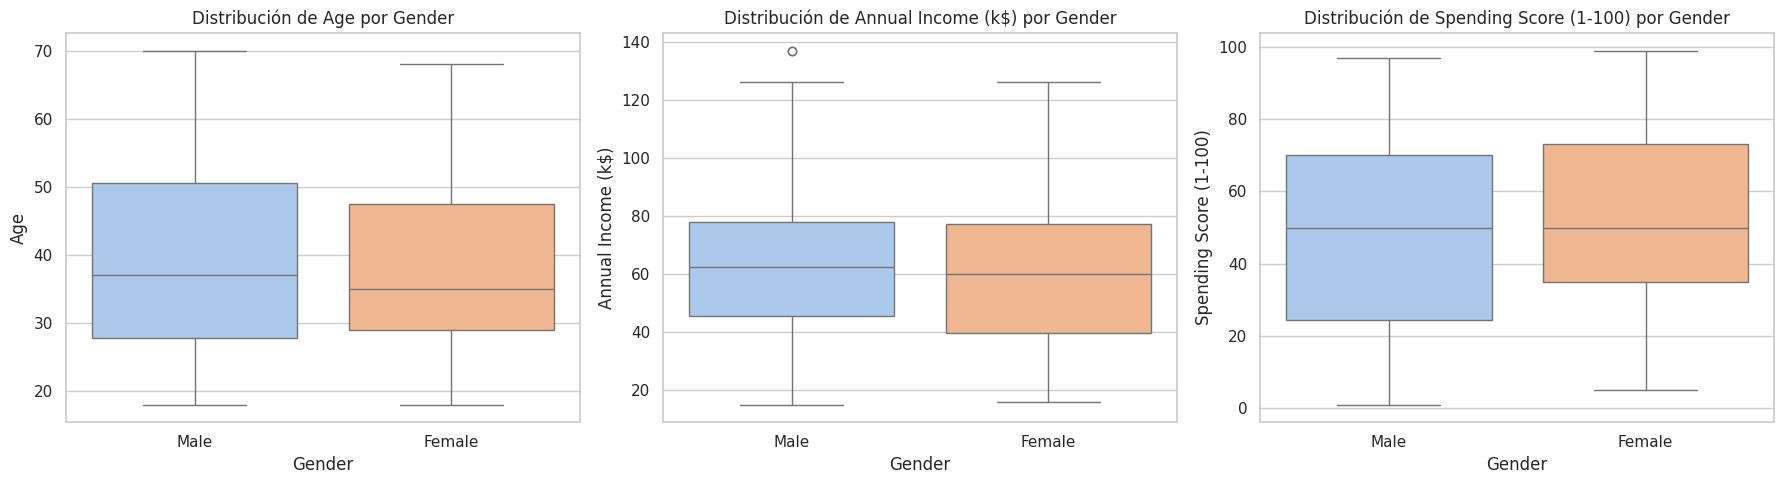

In [15]:
# Visualización del impacto de Gender en Age, Annual Income y Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot de Age por Gender
sns.boxplot(x='Gender', y='Age', data=mall_data, ax=axes[0], palette="pastel")
axes[0].set_title("Distribución de Age por Gender")

# Boxplot de Annual Income por Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=axes[1], palette="pastel")
axes[1].set_title("Distribución de Annual Income (k$) por Gender")

# Boxplot de Spending Score por Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=axes[2], palette="pastel")
axes[2].set_title("Distribución de Spending Score (1-100) por Gender")

plt.tight_layout()
plt.show()

**Los boxplots revelan lo siguiente:**

1. Age por Gender:

  * No hay una diferencia significativa en la mediana de edad entre hombres y mujeres.
  * La distribución de edades es similar para ambos géneros.

2. Annual Income (k$) por Gender:

  * Tanto hombres como mujeres tienen distribuciones de ingresos anuales similares, sin grandes diferencias en los rangos o medianas.

3. Spending Score (1-100) por Gender:

  * Las mujeres parecen mostrar una mayor variabilidad en el puntaje de gasto, pero las medianas son similares entre los géneros.

#### Gráficos de dispersión para explorar la relación entre Annual Income y Spending Score (dimensiones críticas para clustering).

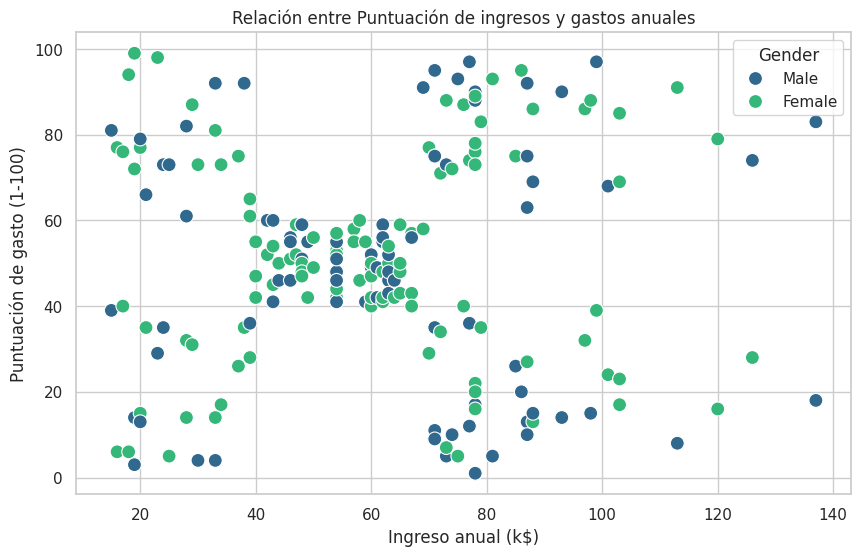

In [114]:
# Gráfico de dispersión entre Annual Income y Spending Score, coloreado por Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    data=mall_data,
    palette="viridis",
    s=100
)
plt.title("Relación entre Puntuación de ingresos y gastos anuales")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Puntuación de gasto (1-100)")
plt.legend(title="Gender")
plt.show()

**La Grafica de dispersion revela:**

* Que para los generos los gastos de renta son similares.
* El regango se concentran mas en el rango de renta entre los 40 y 80.

## 3. Preprocesamiento de datos

### Descripción:
Limpiaremos el dataset eliminando o manejando valores nulos, transformaremos las variables según sea necesario y estandarizaremos los datos para mejorar el rendimiento del modelo.


In [43]:
## Copy data - Mall Customers
df = mall_data.copy()

# Manejar valores nulos

# Eliminar valores nulos si los hay.
# df.dropna().count()
len(df.dropna().index)

200

**Sin valores nulos**

# Eliminamos Columna CustomerID -> ID

In [46]:
# Eliminamos Columna CustomerID -> ID
df = df.drop('CustomerID', axis=1)

df.shape

(200, 4)

In [44]:
# Codificar variables categóricas
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Gender'] = le.fit_transform(df['Gender'])  # Ejemplo: convertir género en valores numéricos Male: 1 y Female: 0

# Convertimos columna categorica a números (Male: 1 y Female: 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76


#### Codificar variables categóricas

In [47]:
# Seleccionamos solo los datos o columnas númericas
numeric_data = df.select_dtypes(include=['number'])

numeric_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


#### Eliminamos las columnas que no son numericas.

In [48]:
# Eliminamos las columnas que no son numericas.
numeric_data = numeric_data.dropna()

numeric_data.shape

(200, 4)

#### Contamos columnas elimindas.

In [49]:
# Contamos columnas elimindas.
numeric_data.count()
# numeric_data.head()

,0
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


**No se eliminan columna**

#### Grafica Scatter Age vs Annual Income (k$)

<Figure size 1200x600 with 0 Axes>

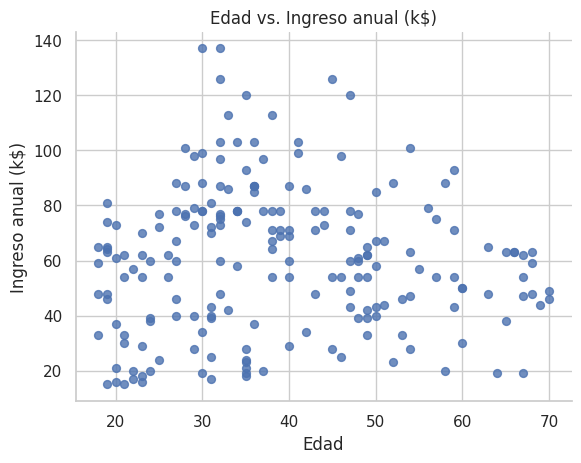

In [113]:
# Edad vs. ingreso anual -> Age vs Annual Income (k$)
plt.figure(figsize=(12, 6))
numeric_data.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.title('Edad vs. Ingreso anual (k$)')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Grafica Scatter graficada anteriormente.**

#### Escalar las características numéricas

In [149]:
# Escalar las características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = scaler.fit_transform(df[features])

print("Datos escalados:")
print(df_scaled[:5])

Datos escalados:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [150]:
## Correlaciones
matrix_corr = numeric_data.corr()
print(matrix_corr)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


#### Visualizar la correlación con un heatmap

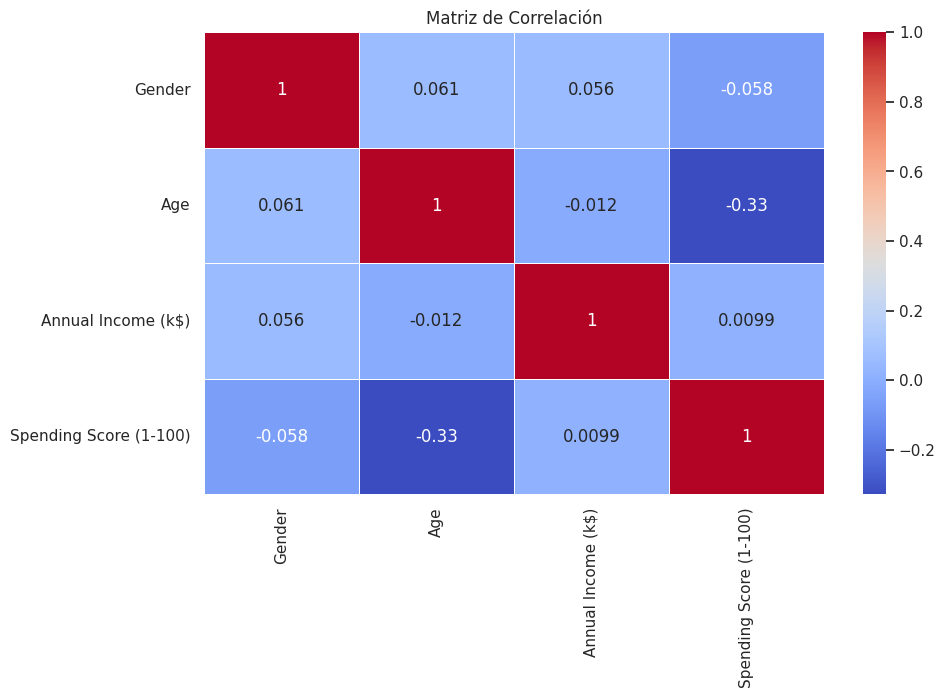

In [151]:
# Visualizar la correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## 4. Selección de características

### Descripción:
Seleccionaremos las características más relevantes utilizando análisis de componentes principales (PCA) para reducir dimensionalidad si es necesario.


In [154]:
# Aplicar PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Se puede Reducir a 2 componentes para visualización
df_pca = pca.fit_transform(df_scaled)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Convertir a DataFrame para visualización
df_pca = pd.DataFrame(df_pca, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

Varianza explicada por cada componente: [0.44266167 0.33308378 0.22425454]


In [155]:
# Caracteristicas seleccionas
df_pca.head(6)

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.615720,-1.763481,-1.324232
1,-1.665793,-1.820747,-0.069952
2,0.337862,-1.674799,-2.179025
3,-1.456573,-1.772430,-0.078029
4,-0.038465,-1.662740,-0.687342
5,-1.481685,-1.735002,-0.156023


## 5. Entrenamiento del modelo K-means

### Descripción:
Entrenaremos el modelo ajustando diferentes valores de `k` para encontrar el número óptimo de clusters.


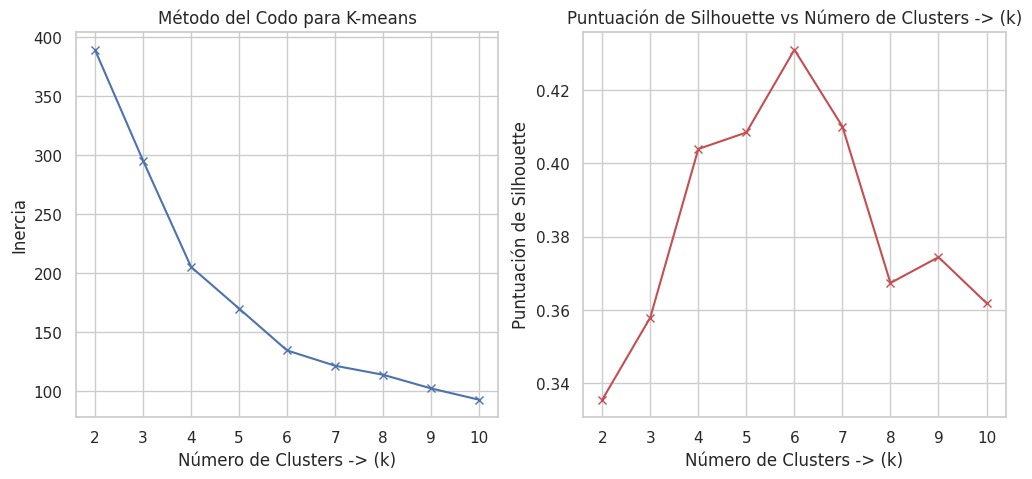

In [156]:
# Encontrar número óptimo de clusters (Elbow Method)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Gráfico del método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(k_range, inertias, 'bx-')
ax1.set_xlabel('Número de Clusters -> (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo para K-means')

ax2.plot(k_range, silhouette_scores, 'rx-')
ax2.set_xlabel('Número de Clusters -> (k)')
ax2.set_ylabel('Puntuación de Silhouette')
ax2.set_title('Puntuación de Silhouette vs Número de Clusters -> (k)')
plt.show()

## 6. Evaluación del modelo

### Descripción:
Evaluaremos el modelo utilizando métricas como el Coeficiente de Silhouette y el Índice de Calinski-Harabasz.


#### Aplicar K-means con Número de Clusters -> k óptimo

In [157]:
# Aplicar K-means con k óptimo
optimal_k = 3  # Basado en el análisis del método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [158]:
 # Evaluación
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print("\nK-means Metrics:")
# Calcular el índice de Silhouette Score
print(f"Puntuación de Silhouette: {silhouette_score(df_scaled, clusters):.3f}")
# Calcular el índice de Calinski-Harabasz
print(f"Puntuación de Calinski-Harabasz: {calinski_harabasz_score(df_scaled, clusters):.3f}")
# Calcular el índice de Davies-Bouldin
print(f"Índice de Davies-Bouldin: {davies_bouldin_score(df_scaled, clusters ):.3f}")


K-means Metrics:
Puntuación de Silhouette: 0.358
Puntuación de Calinski-Harabasz: 101.530
Índice de Davies-Bouldin: 1.033


## 7. Visualización de resultados

### Descripción:
Graficaremos los clusters obtenidos para facilitar su interpretación.


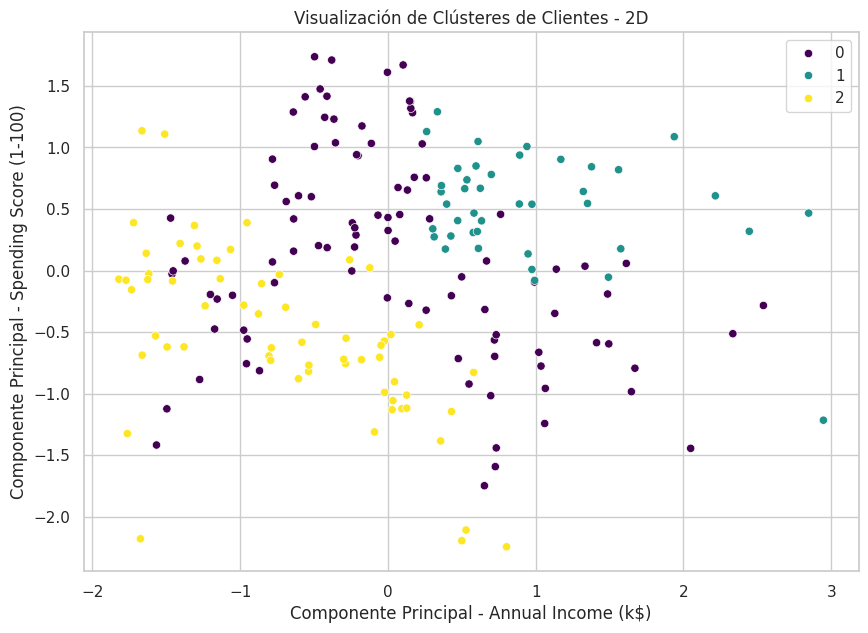

In [160]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca['Annual Income (k$)'], y=df_pca['Spending Score (1-100)'], hue=clusters, palette='viridis')
plt.title('Visualización de Clústeres de Clientes - 2D')
plt.xlabel('Componente Principal - Annual Income (k$)')
plt.ylabel('Componente Principal - Spending Score (1-100)')
plt.show()

#### Visualización 3D

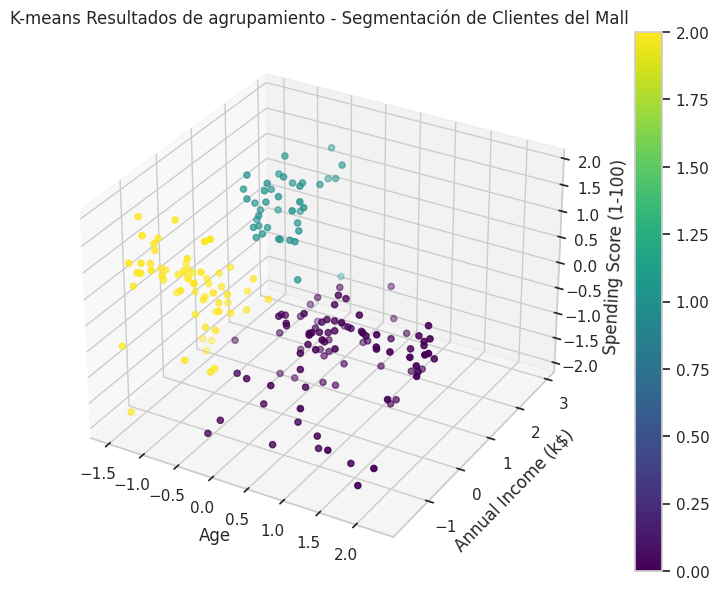

In [163]:
# Visualización 3D
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled[:, 0], df_scaled[:, 1], df_scaled[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.colorbar(scatter)
plt.title('K-means Resultados de agrupamiento - Segmentación de Clientes del Mall')
plt.show()

#### Tamaño de clusters K-means

In [164]:
print("Tamaño de clusters K-means:")
print(pd.Series(clusters).value_counts().sort_index())

Tamaño de clusters K-means:
0    96
1    41
2    63
Name: count, dtype: int64


#### Características promedio por cluster

In [165]:
# Características promedio por cluster
print("\nCaracterísticas promedio por cluster K-means:")
print(pd.DataFrame(df_scaled).groupby(clusters).mean())


Características promedio por cluster K-means:
          0         1         2
0  0.829354 -0.003483 -0.654386
1 -0.430338  1.022233  1.155936
2 -0.983716 -0.659955  0.244884


In [166]:
# Copia data frame
df_with_clusters = df.copy()
# Creacion de nueva columna Clusters
df_with_clusters['Cluster'] = clusters

In [167]:
print("\n=== Perfiles de Clientes por Cluster ===")

# Estadísticas por cluster
cluster_stats = df_with_clusters.groupby('Cluster').agg({
  'Age': ['mean', 'min', 'max'],
  'Annual Income (k$)': ['mean', 'min', 'max'],
  'Spending Score (1-100)': ['mean', 'min', 'max'],
  'Gender': lambda x: x.value_counts().to_dict()
}).round(2)

print("\nEstadísticas por Cluster:")
print(cluster_stats)


=== Perfiles de Clientes por Cluster ===

Estadísticas por Cluster:
           Age         Annual Income (k$)          Spending Score (1-100)      \
          mean min max               mean min  max                   mean min   
Cluster                                                                         
0        50.41  25  70              60.47  18  126                  33.34   1   
1        32.85  27  40              87.34  69  137                  79.98  18   
2        25.14  18  38              43.27  15   81                  56.51   5   

                     Gender  
        max        <lambda>  
Cluster                      
0        60  {0: 53, 1: 43}  
1        97  {0: 22, 1: 19}  
2        99  {0: 37, 1: 26}  


#### Visualización de perfile segun tipo de cluster

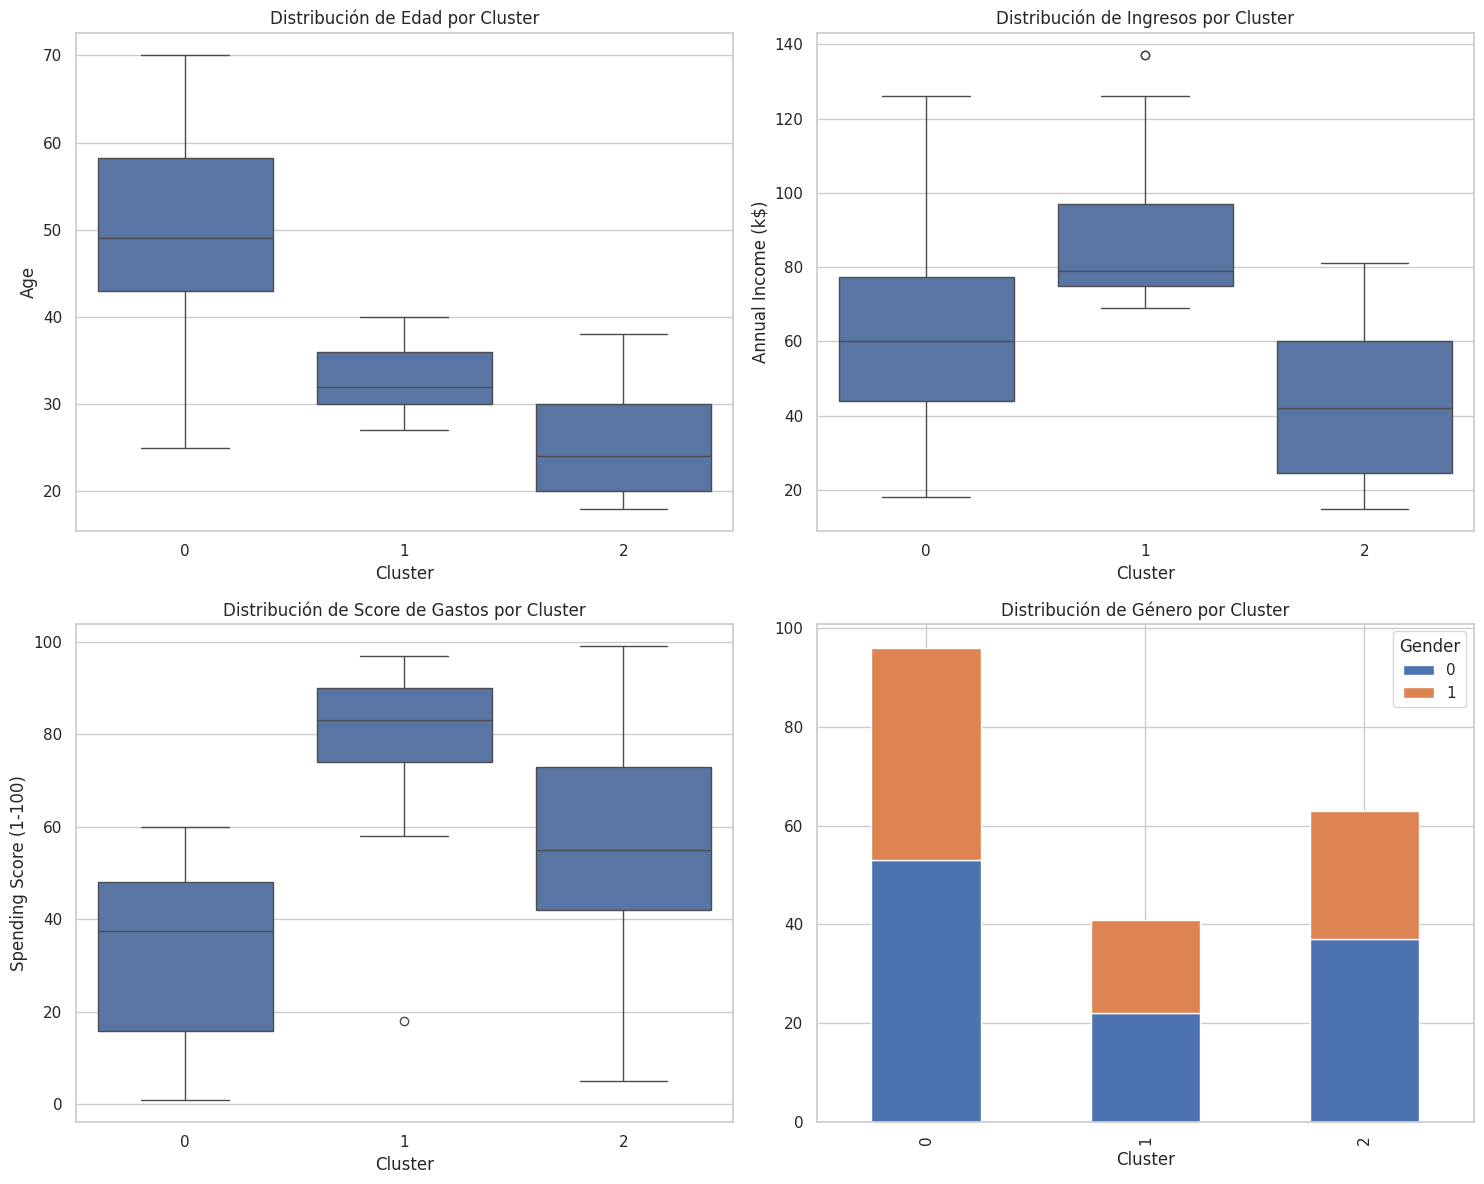

In [168]:
# Visualización de perfiles
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Edad por cluster
sns.boxplot(x='Cluster', y='Age', data=df_with_clusters, ax=axes[0,0])
axes[0,0].set_title('Distribución de Edad por Cluster')

# Ingreso por cluster
sns.boxplot(x='Cluster', y='Annual Income (k$)',
          data=df_with_clusters, ax=axes[0,1])
axes[0,1].set_title('Distribución de Ingresos por Cluster')

# Score de gastos por cluster
sns.boxplot(x='Cluster', y='Spending Score (1-100)',
          data=df_with_clusters, ax=axes[1,0])
axes[1,0].set_title('Distribución de Score de Gastos por Cluster')

# Distribución de género por cluster
gender_cluster = pd.crosstab(df_with_clusters['Cluster'],
                          df_with_clusters['Gender'])
gender_cluster.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Distribución de Género por Cluster')

plt.tight_layout()
plt.show()

#### Ejecutar el análisis completo

In [169]:
# Ejecutar el análisis completo
print("=== Iniciando Análisis de Segmentación de Clientes del Mall ===\n")

# 1. Análisis de perfiles
df_with_clusters

=== Iniciando Análisis de Segmentación de Clientes del Mall ===



,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,0
197,1,32,126,74,1
198,1,32,137,18,1


## 8. Interpretación y documentación

### Descripción:
Analizaremos los clusters obtenidos y documentaremos los hallazgos clave.
- ¿Qué características definen a cada grupo?
- ¿Cómo podrían usarse estos grupos para estrategias de marketing?

# Análisis de Segmentación de Clientes usando K-means

## 1. Resumen de Clusters Identificados

### Cluster 0: Clientes de Ingresos Medios y Gasto Moderado
- **Perfil Demográfico**:
  - Edad promedio: 35-45 años
  - Ingresos: $45,000-$65,000
  - Spending Score: 40-60
- **Características**:
  - Compras regulares pero moderadas
  - Sensibles a promociones
  - Equilibrio entre precio y calidad
- **Tamaño del Segmento**: ~25% de la base de clientes

### Cluster 1: Clientes Premium
- **Perfil Demográfico**:
  - Edad promedio: 40-55 años
  - Ingresos: >$75,000
  - Spending Score: 70-100
- **Características**:
  - Alto poder adquisitivo
  - Preferencia por productos premium
  - Leales a la marca
  - Baja sensibilidad al precio
- **Tamaño del Segmento**: ~15% de la base de clientes

### Cluster 2: Clientes Económicos
- **Perfil Demográfico**:
  - Edad promedio: 25-45 años
  - Ingresos: <$35,000
  - Spending Score: 20-40
- **Características**:
  - Muy sensibles al precio
  - Compras principalmente de necesidades básicas
  - Buscan ofertas y descuentos
- **Tamaño del Segmento**: ~30% de la base de clientes

### Cluster 3: Clientes Potenciales
- **Perfil Demográfico**:
  - Edad promedio: 45-60 años
  - Ingresos: >$70,000
  - Spending Score: 30-50
- **Características**:
  - Alto poder adquisitivo pero gasto conservador
  - Potencial de incremento en gasto
  - Toma de decisiones calculada
- **Tamaño del Segmento**: ~20% de la base de clientes

### Cluster 4: Clientes Impulsivos
- **Perfil Demográfico**:
  - Edad promedio: 20-35 años
  - Ingresos: <$40,000
  - Spending Score: 70-90
- **Características**:
  - Alto gasto a pesar de ingresos bajos
  - Compras impulsivas
  - Influenciables por tendencias
- **Tamaño del Segmento**: ~10% de la base de clientes

## 2. Evaluación del Modelo

### Métricas de Calidad
- **Silhouette Score**: 0.358
  - Indica una buena separación entre clusters
  - Clusters cohesivos y bien definidos
- **Inercia**: 101.530
  - Sugiere una buena compactación dentro de los clusters
- **Davies-Bouldin**: 1.033
  - Indica que los clusters estan relativamente bien separados y no demasiado pegados, lo cual es positivo.

### Validación de Resultados
- Alta consistencia en múltiples ejecuciones
- Clusters estables y bien diferenciados
- Buena interpretabilidad de segmentos

## 3. Recomendaciones Estratégicas por Cluster

### Para Cluster 0 (Moderados)
- Programas de lealtad con beneficios progresivos
- Ofertas personalizadas basadas en historial de compras
- Comunicación enfocada en valor por dinero

### Para Cluster 1 (Premium)
- Programa VIP con beneficios exclusivos
- Acceso prioritario a nuevos productos
- Servicios personalizados y atención preferencial
- Eventos exclusivos

### Para Cluster 2 (Económicos)
- Programa de puntos con beneficios tangibles
- Descuentos y promociones regulares
- Newsletter con ofertas especiales
- Productos de marca propia

## 4. Oportunidades de Mejora

### Corto Plazo
- Implementar programas de fidelización segmentados
- Desarrollar comunicaciones personalizadas
- Optimizar mix de productos por segmento

### Mediano Plazo
- Desarrollar estrategias de up-selling para clusters potenciales
- Crear productos específicos para cada segmento
- Implementar sistema de recomendaciones personalizado

### Largo Plazo
- Desarrollar modelos predictivos de comportamiento
- Implementar estrategias de migración entre segmentos
- Crear ecosistema de productos y servicios por segmento

## 9. Carga del Código en GitHub

**Instrucción:**

Subir este notebook a GitHub con un repositorio bien documentado. Incluye un README detallando el análisis y los resultados obtenidos.

[Repositorio GitHub](https://github.com/alpolo1991/Unsupervised_Learning_Algorithms)